In [3]:
#This block subsets the input dataframe to just the continuous numeric fields, normalizes them, and then creates the 
#principal components. 
#import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import cosine_similarity

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#reads in dataframe
input_data = pd.read_csv('/home/llevin/Desktop/capstone2/cleaned_data/input_data_vF3.csv')

#subsets fields to numeric continous/discrete
num_cols = input_data.select_dtypes(include=['int64','float64']).columns
num_cols = [col for col in num_cols if col not in ['result','full_time_home_goals','full_time_away_goals',
                                                   'half_time_home_goals','half_time_away_goals','half_time_results'
                                                   ,'at_Emirates Stadium','at_Boleyn Ground','at_King Power Stadium'
                                                   ,'at_Old Trafford','at_Loftus Road','at_Britannia Stadium'
                                                   ,'at_The Hawthorns','at_Anfield','at_Sports Direct Arena'
                                                   ,'at_Turf Moor','at_Villa Park','at_Stamford Bridge','at_Selhurst Park'
                                                   ,'at_Goodison Park',"at_St Mary's Stadium",'at_Liberty Stadium',
                                                   'at_KC Stadium','at_Stadium of Light','at_White Hart Lane'
                                                   ,'at_Etihad Stadium','at_Carrow Road','at_Molineux Stadium',
                                                   'at_Cardiff City Stadium','at_Craven Cottage','at_Madejski Stadium']]
pca_cols = [col for col in num_cols if col not in ['home_team_api_id','away_team_api_id']]
X = input_data[pca_cols]

#normalizes data
scale = StandardScaler()

norm_data = scale.fit_transform(X)
norm_data.shape

#creates PCA dataframe
soccer_pca = PCA()
soccer_pca.fit(norm_data)
soccer_pcs = soccer_pca.transform(norm_data)
soccer_pcs = pd.DataFrame(soccer_pcs,columns=['PC'+str(i) for i in range(1, soccer_pcs.shape[1]+1)])

soccer_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54
0,-3.992785,2.860748,1.291245,-0.634438,-1.772450,0.656505,0.900706,-0.133790,-0.261634,0.469813,...,-0.491819,-0.406216,0.404790,-0.190667,-0.134359,-0.251449,-0.016682,-0.048369,-0.172801,-5.746807e-16
1,-0.272170,1.622561,-0.507536,-1.341210,-0.186028,-0.999777,-1.916770,-0.665142,-1.043099,0.733219,...,-1.183663,-1.371301,0.464723,-0.345570,0.121034,0.250932,-0.667785,0.048407,-0.188977,7.504687e-16
2,2.551646,2.510100,0.378293,-0.633906,-0.098940,-1.658850,-0.196158,0.494165,-0.194364,0.136916,...,0.295405,-0.427836,0.932516,-1.006938,0.151132,-0.522793,-0.074921,-0.061261,0.011233,1.940396e-16
3,-2.160959,2.800019,2.080575,-2.284027,-1.846261,0.564420,1.201558,-0.228555,0.355542,-0.790738,...,-0.772448,0.111581,0.184743,-0.407438,0.216801,0.137780,0.006925,0.252981,0.069306,-5.788752e-17
4,-0.130277,0.739810,-1.278930,-1.206593,-0.360327,-0.344655,-0.927536,1.131761,-1.172401,0.701152,...,0.881761,-0.216317,-0.319979,-1.048455,0.357244,0.382116,-0.662567,0.002326,-0.097855,-4.604056e-16


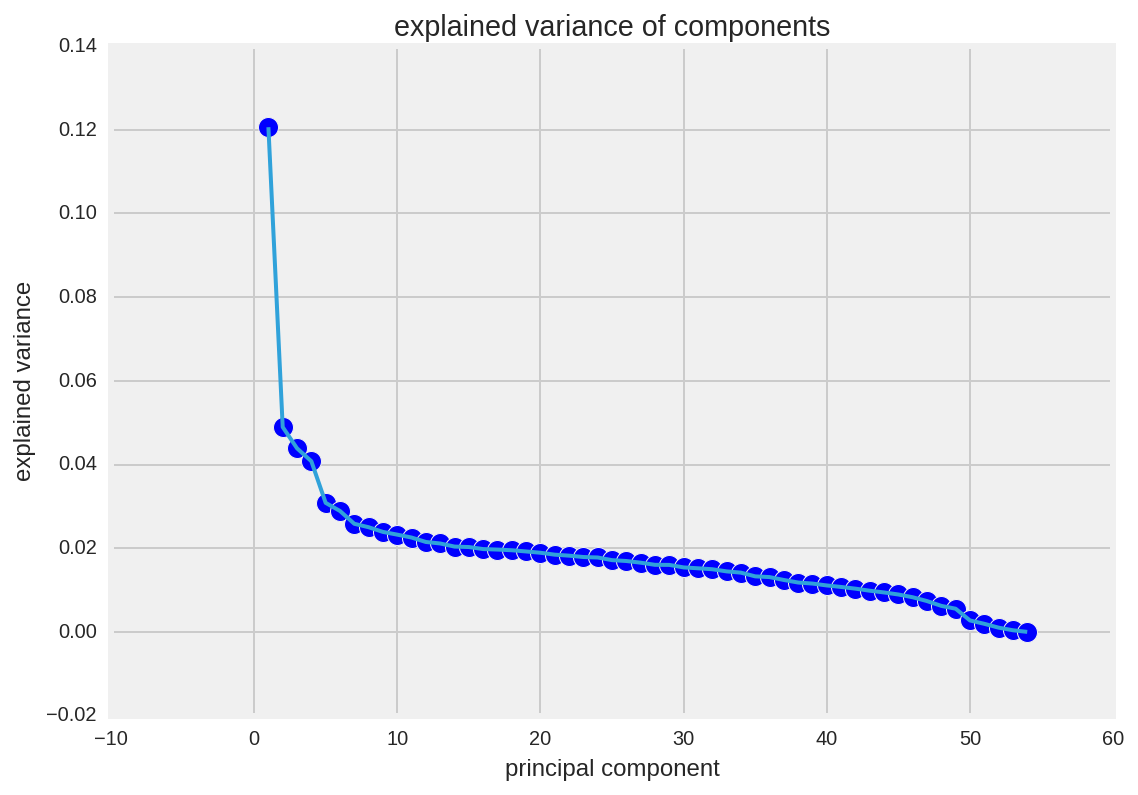

In [30]:
#this plots the amount of explained variance for each principal component
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, soccer_pcs.shape[1]+1), soccer_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, soccer_pcs.shape[1]+1), soccer_pca.explained_variance_ratio_, s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

This shows that not a huge amount of variance is explained by any one component. I decided to take the first four components which explains ~20% of the variance. 

In [3]:
#the next blocks are copies which print the positive attributes from highest weight to lowest.
comp_df = pd.DataFrame()
components = []
columns = []
for col, comp in zip(X.columns, soccer_pca.components_[0]):
    if comp>0:
        components.append(comp)
        columns.append(col)
comp_df['Variable'] = columns
comp_df['PCA_Comps'] = components
comp_df.sort_values('PCA_Comps',ascending=False)

,Variable,PCA_Comps
1,away_shots,0.307251
24,away_possession,0.303829
0,away_corners,0.233834
15,away_shoton_other,0.233741
23,away_crosses,0.216139
2,away_shots_target,0.214013
20,away_shotoff_other,0.203951
16,away_shoton_bigchance,0.102796
21,away_shotoff_bigchance,0.094786
11,away_goal_other,0.089585


In [5]:
comp_df = pd.DataFrame()
components = []
columns = []
for col, comp in zip(X.columns, soccer_pca.components_[1]):
    if comp>0:
        components.append(comp)
        columns.append(col)
comp_df['Variable'] = columns
comp_df['PCA_Comps'] = components
comp_df.sort_values('PCA_Comps',ascending=False)

,Variable,PCA_Comps
8,temp (F),0.426834
9,dew (F),0.423629
13,visibility (mi),0.330308
11,wind direction,0.268238
12,wind speed (mph),0.246394
10,humidity,0.207252
3,home_fouls,0.128709
6,half_time_result,0.080409
0,away_fouls,0.079548
7,Capacity,0.055139


In [6]:
comp_df = pd.DataFrame()
components = []
columns = []
for col, comp in zip(X.columns, soccer_pca.components_[2]):
    if comp>0:
        components.append(comp)
        columns.append(col)
comp_df['Variable'] = columns
comp_df['PCA_Comps'] = components
comp_df.sort_values('PCA_Comps',ascending=False)

,Variable,PCA_Comps
0,away_fouls,0.235708
1,away_yellow_cards,0.156258
3,home_fouls,0.110857
5,home_yellow_cards,0.086652
10,home_shotoff_freekicks,0.055737
4,home_red_cards,0.055322
2,away_red_cards,0.033786
12,away_possession,0.032534
6,home_goal_freekicks,0.024166
11,home_shotoff_bad_shot,0.019824


In [7]:
comp_df = pd.DataFrame()
components = []
columns = []
for col, comp in zip(X.columns, soccer_pca.components_[3]):
    if comp>0:
        components.append(comp)
        columns.append(col)
comp_df['Variable'] = columns
comp_df['PCA_Comps'] = components
comp_df.sort_values('PCA_Comps',ascending=False)

,Variable,PCA_Comps
3,half_time_result,0.509338
8,home_goal_other,0.349259
17,away_crosses,0.158690
14,away_shotoff_headers,0.125640
2,home_shots_target,0.117741
4,Capacity,0.099478
7,home_goal_volleys,0.086155
6,home_goal_freekicks,0.082339
5,home_goal_headers,0.080056
10,away_shoton_headers,0.077485


To me these components can be generally grouped as how important the following stats are:
-PC1-->away offensive statistics (shots, crosses, possession, corners)
-PC2-->weather statistics (humidity, temp, etc.)
-PC3-->overall physicality stats (fouls, yellow/red cards)
-PC4-->first half home team performance (half time result, home goals)

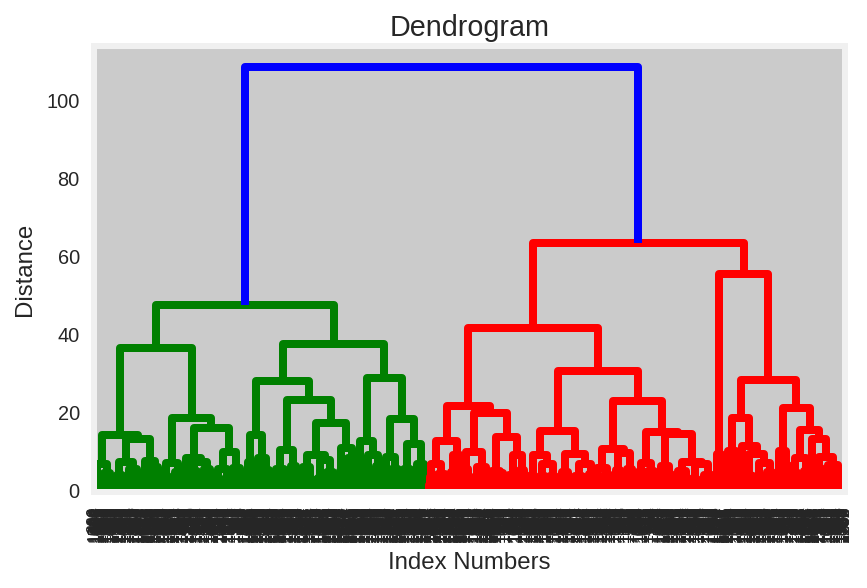

0.400146182694


In [33]:
# this takes the first four PCs and creates a dendogram with agglomerative hierarchical clustering and shows the
# cophenetic coefficiant
def plot_dendogram(df):
    
    # Data prep
    X = df.as_matrix(columns=None)
    Z = linkage(X, 'ward')
    c, coph_dists = cophenet(Z, pdist(X))
    
    # plotting
    plt.title('Dendrogram')
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
    plt.show()
    
    print c
    
plot_dendogram(soccer_pcs[['PC1','PC2','PC3','PC4']])

This shows multiple possible clusters with a moderate coefficiant. 

In [15]:
#Creates the clusters at the max distance, taken from the previous dendogram, then prints out the number of data
#points in each cluster and the mean of the four principal components across clusters.
def clusters_array(df,max_dist):
    X = df.as_matrix(columns=None)
    Z = linkage(X, 'ward')
    clusters = fcluster(Z, max_dist, criterion='distance')
    return clusters

clusters = clusters_array(soccer_pcs[['PC1','PC2','PC3','PC4']],60)
soccer_pcs['cluster'] = clusters
print soccer_pcs.groupby('cluster').count().reset_index()['PC1']
soccer_output = soccer_pcs[['PC1','PC2','PC3','PC4','cluster']].groupby('cluster').mean().reset_index().T
soccer_output

0    725
1    622
2    279
Name: PC1, dtype: int64


,0,1,2
cluster,1.000000,2.000000,3.000000
PC1,-2.107288,0.909649,3.447964
PC2,-0.041220,0.486798,-0.978151
PC3,-0.278243,0.661446,-0.751588
PC4,0.157979,-0.176587,-0.016838


This has a pretty even distribution and better than the next split down. It also seems to have seemingly different amounts for the principal components. Even though the components don't explain a lot of variance, given the weights above I would try to classify these three groups as:
    

    Cluster 1: Home team presses high during the first half to limit away offense, but doesn't dive into tackles to give away fouls. Tries to employ this on colder/drier days but not necessary (PC2 is nearly 0).

    Cluster 2: Away team tries to be aggressive/physical on defense (high PC3) and halt the home team's attack (lowest PC4). This happens on hotter/wetter days (higher PC2) which could help the game stop/start.
    
    Cluster 3: Away team tries to dominate the game (highest PC1) and pepper the home goal with shots. Doesn't need to commit fouls (low PC3) as they keep the ball for the majority. Both halfs are played similarly (PC4 near 0) but prefers this on colder/drier days which helps keep passing crisp and doesn't wear down the players (lowest PC3).

In [14]:
cluster_1 = np.array(soccer_output[0],dtype=pd.Series)
cluster_2 = np.array(soccer_output[1],dtype=pd.Series)
cluster_3 = np.array(soccer_output[2],dtype=pd.Series)
print cosine_similarity(cluster_1,cluster_2),cosine_similarity(cluster_2,cluster_3),cosine_similarity(cluster_1,cluster_3)

[[ 0.60597886]] [[ 0.208389]] [[-0.08659813]]


/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) i

This shows me that clusters 2 & 3 are pretty similar but clusters 1 & 2 and 1 & 3 are substantially different in directions. This could make sense as both clusters 2 & 3 are geared toward away team tactics.